# Routing Optimization using Graph Algorithms

Step 1: Import Libraries 

In [47]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

Step 2: Generate Graph

In [48]:
 num_nodes = 10
 max_x = 100
 max_y = 100

 G = nx.Graph()

 nodes_list = {}
 for i in range(num_nodes):
     G.add_node(i)
     # Define the attributes of each node
     nodes_list[i] = {
         'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  
         'bandwidth': random.randint(1, 10),
         'mobility': random.random(),  
         'transmission_power': random.uniform(5, 20),  
         'packet_loss': random.uniform(0, 1),  
         'battery_capacity': random.uniform(10, 100),  
     }

 for i in range(num_nodes):
     for j in range(i+1, num_nodes):
         if np.random.rand() < 0.5:
             G.add_edge(i, j)
             

Step 3: Create a datafame from node list and store it in csv

In [49]:
import pandas as pd

# Create a DataFrame from the nodes_list dictionary
nodes_df = pd.DataFrame(nodes_list).T

# Reset the index and rename the index column to 'Node'
nodes_df.reset_index(inplace=True)
nodes_df.rename(columns={'index': 'Node'}, inplace=True)

# Display the DataFrame
nodes_df


,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(40.11245931398546, 13.27030911903857)",1,0.655755,14.118182,0.082619,49.734453
1,1,"(9.978962256085765, 30.51171502718084)",6,0.680368,7.340004,0.914541,33.916077
2,2,"(40.03405603227036, 88.76186952863941)",10,0.803764,12.52887,0.332569,85.271871
3,3,"(48.39297377365405, 11.254257254038535)",7,0.501584,15.986041,0.941173,59.463785
4,4,"(2.550478737120443, 25.68423964093035)",6,0.36716,15.89016,0.371564,16.238623
5,5,"(91.91403205008739, 5.697042498808291)",9,0.03651,11.746958,0.34466,63.641023
6,6,"(66.74475916635937, 83.0602767373214)",6,0.351962,8.139285,0.409218,93.601919
7,7,"(41.38567484614871, 11.025790850604178)",4,0.631421,10.128727,0.733548,32.98266
8,8,"(76.88707958440037, 68.75744869318213)",4,0.630626,19.075926,0.07294,19.618371
9,9,"(36.86063484522679, 58.626562342648434)",9,0.089273,10.419215,0.840168,39.431918


In [50]:
nodes_df.to_csv('improved.csv')

Step 4:Load csv and drop unecceary columns

In [51]:
import pandas as pd

df = pd.read_csv('improved.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(40.11245931398546, 13.27030911903857)",1,0.655755,14.118182,0.082619,49.734453
1,1,"(9.978962256085765, 30.51171502718084)",6,0.680368,7.340004,0.914541,33.916077
2,2,"(40.03405603227036, 88.76186952863941)",10,0.803764,12.528870,0.332569,85.271871
3,3,"(48.39297377365405, 11.254257254038535)",7,0.501584,15.986041,0.941173,59.463785
4,4,"(2.550478737120443, 25.68423964093035)",6,0.367160,15.890160,0.371564,16.238623
5,5,"(91.91403205008739, 5.697042498808291)",9,0.036510,11.746958,0.344660,63.641023
6,6,"(66.74475916635937, 83.0602767373214)",6,0.351962,8.139285,0.409218,93.601919
7,7,"(41.38567484614871, 11.025790850604178)",4,0.631421,10.128727,0.733548,32.982660
8,8,"(76.88707958440037, 68.75744869318213)",4,0.630626,19.075926,0.072940,19.618371
9,9,"(36.86063484522679, 58.626562342648434)",9,0.089273,10.419215,0.840168,39.431918


Step 5:Create Graph and Plot it

In [52]:
# Number of nodes
num_nodes = df.shape[0]

# Creating a graph
G = nx.Graph()

# Adding edges based on the condition
for i in range(num_nodes):
  for j in range(num_nodes):
    if i != j:
      if np.random.rand() < 0.4:
        G.add_edge(i, j)
        G.add_edge(j, i)

# Checking the created edges
G.edges()

EdgeView([(0, 5), (0, 6), (0, 7), (0, 8), (0, 4), (5, 1), (5, 3), (5, 7), (5, 9), (6, 1), (6, 4), (6, 2), (6, 7), (6, 8), (6, 9), (7, 2), (7, 3), (7, 8), (7, 9), (8, 1), (8, 3), (8, 4), (8, 9), (1, 3), (1, 9), (1, 4), (3, 2), (3, 9), (9, 4), (9, 2)])

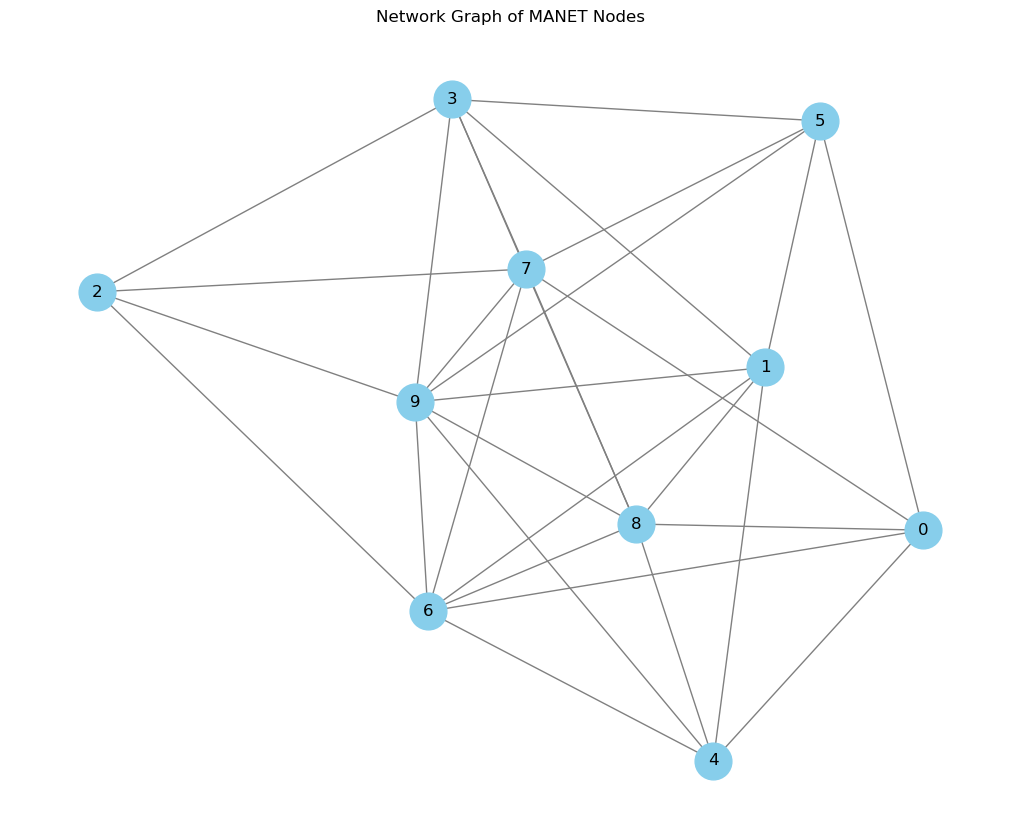

In [53]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Network Graph of MANET Nodes")
plt.show()


Graph algorithms application steps :
    - Implement algorithm working logic
    - Assume source/destination and call function
    - Draw network graph and highlight path selected
    - Calculate average health of transfer

# Bellman Ford Algorithm

In [54]:
import pandas as pd

def bellman_ford(source, destination, G, nodes_df):

  if source == destination:
    return [source]

  # Initialization
  dist = {node: float('inf') for node in nodes_df['Node']}
  dist[source] = 0

  prev = {node: None for node in nodes_df['Node']}

  # Relax edges
  for _ in range(len(nodes_df)-1):

    for edge in G.edges():
      u, v = edge

      # Get metrics
      bandwidth = min(nodes_df.loc[u]['bandwidth'], nodes_df.loc[v]['bandwidth'])
      mobility = max(nodes_df.loc[u]['mobility'], nodes_df.loc[v]['mobility'])
      transmission_power = min(nodes_df.loc[u]['transmission_power'], nodes_df.loc[v]['transmission_power'])
      battery_capacity = min(nodes_df.loc[u]['battery_capacity'], nodes_df.loc[v]['battery_capacity'])
      packet_loss = max(nodes_df.loc[u]['packet_loss'], nodes_df.loc[v]['packet_loss'])

      # Edge weight
      edge_weight = bandwidth - mobility + transmission_power + battery_capacity - packet_loss

      if dist[u] + edge_weight < dist[v]:
        dist[v] = dist[u] + edge_weight
        prev[v] = u

  # Detect negative cycles
  for edge in G.edges():
      u, v = edge

      bandwidth = min(nodes_df.loc[u]['bandwidth'], nodes_df.loc[v]['bandwidth'])
      mobility = max(nodes_df.loc[u]['mobility'], nodes_df.loc[v]['mobility'])
      transmission_power = min(nodes_df.loc[u]['transmission_power'], nodes_df.loc[v]['transmission_power'])
      battery_capacity = min(nodes_df.loc[u]['battery_capacity'], nodes_df.loc[v]['battery_capacity'])
      packet_loss = max(nodes_df.loc[u]['packet_loss'], nodes_df.loc[v]['packet_loss'])

      edge_weight = bandwidth - mobility + transmission_power + battery_capacity - packet_loss

      if dist[u] + edge_weight < dist[v]:
        raise ValueError('Negative weight cycle detected')

  # Construct shortest path
  path = []
  node = destination

  while node is not None:
    path.insert(0, node)
    node = prev[node]

  return path

In [55]:
source = 1
destination = 8
path = bellman_ford(source, destination, G, df)
print(f"Path: {path}")

Path: [8]


In [56]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)

    # Path taken drawn
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    # Draw node labels 
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)

    # Show the graph
    plt.show()


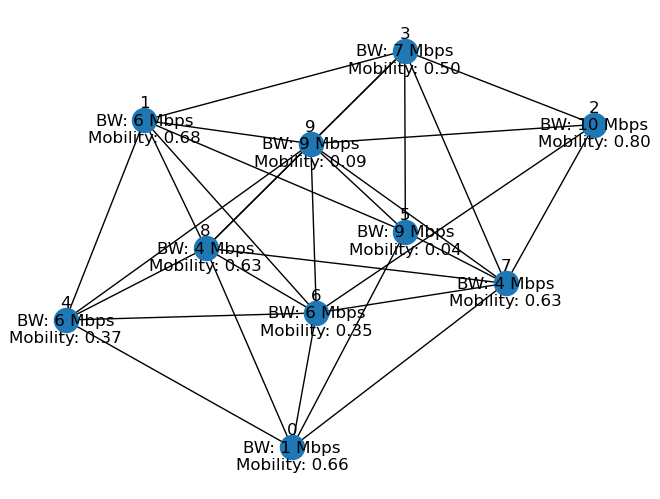

In [57]:
draw_network_graph(G, path, df)

In [58]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))

    df1 = pd.DataFrame(data_list)
    return df1


In [59]:
df1 = calculate_avg_health(G, path, df)
df1

avg health of transfer 0


""


# Dijkstra Algo

In [60]:
def dijkstra(
    source, destination, G, nodes_df
):
    if source == destination:
        return [source]

    visited = set()
    queue = [(source, [source])]

    shortest_path = None
    best_score = float("-inf")

    while queue:
        current, path = queue.pop(0)
        visited.add(current)

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                score = (
                    nodes_df.loc[neighbor]["bandwidth"]
                    - nodes_df.loc[neighbor]["mobility"]
                    + nodes_df.loc[neighbor]["transmission_power"]
                    + nodes_df.loc[neighbor]["battery_capacity"]
                    - nodes_df.loc[neighbor]["packet_loss"]
                )
                if score > best_score:
                    best_score = score
                    next_hop = neighbor
                if neighbor == destination:
                    shortest_path = path + [neighbor]
                    return shortest_path
        if best_score > float("-inf"):
            visited.add(next_hop)
            queue.append((next_hop, path + [next_hop]))
            best_score = float("-inf")

    return shortest_path


In [61]:
source = 1
destination = 8
path = dijkstra(source, destination, G, df)
print(f"Path: {path}")

Path: [1, 8]


In [62]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)

    # Draw the path taken 
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    # Draw node labels 
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)

    # Show graph
    plt.show()


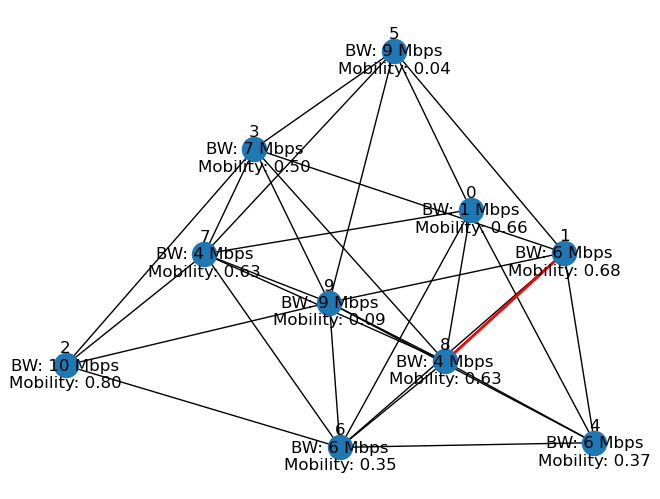

In [63]:
draw_network_graph(G, path, df)

In [64]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))

    df2 = pd.DataFrame(data_list)
    return df2


In [65]:
df1 = calculate_avg_health(G, path, df)
df1

avg health of transfer 29.363466464694287


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,1,8,4,0.680368,7.340004,19.618371,0.914541,29.363466


# Genetic Algo

In [66]:
import random
import numpy as np
import networkx as nx


def genetic_algorithm(source, destination, G, nodes_df):
    population_size = 50
    num_generations = 100
    mutation_probability = 0.1

    def generate_individual():
        return [random.randint(0, len(nodes_df) - 1) for _ in range(random.randint(1, len(nodes_df) - 1))]

    def calculate_fitness(individual):
        fitness = 0
        for i in range(len(individual) - 1):
            start_node = individual[i]
            end_node = individual[i + 1]
            node_props = nodes_df.loc[start_node]
            fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
                'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        node_props = nodes_df.loc[individual[-1]]
        fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
            'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
        return fitness

    def selection(population):
        fitnesses = [calculate_fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        indices = np.random.choice(range(len(population)), size=len(population), p=probabilities)
        return [population[index] for index in indices]

    def crossover(parent1, parent2):
        if len(parent1) > 1 and len(parent2) > 1:
            crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            return child1, child2
        else:
            return parent1, parent2

    def mutation(individual):
        if random.random() < mutation_probability:
            index1 = random.randint(0, len(individual) - 1)
            index2 = random.randint(0, len(nodes_df) - 1)
            individual[index1] = index2

    population = [generate_individual() for _ in range(population_size)]
    for generation in range(num_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)
        population = new_population

    best_individual = min(population, key=calculate_fitness)
    best_path = [source] + best_individual + [destination]
    return best_path


In [67]:
source = 0
destination = 5
path = genetic_algorithm(source, destination, G, df)
print(f"Path: {path}")

Path: [0, 0, 3, 6, 2, 8, 6, 5, 5, 0, 5]


In [68]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)

    # Draw the path taken 
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    # Draw node labels 
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)

    # Show the network graph 
    plt.show()


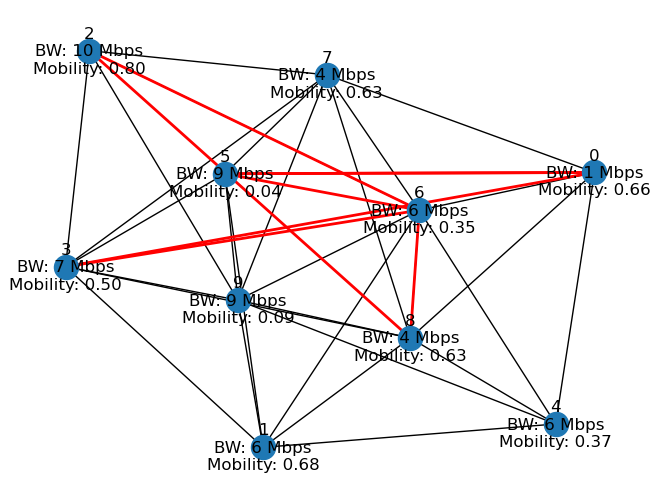

In [69]:
df2 = draw_network_graph(G, path, df)
df2

In [70]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):

  data_list = []
  total_health = 0
  num_edges = 0

  for i in range(len(path) - 1):

    node_a, node_b = path[i], path[i+1]

    bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])

    mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])

    transmission_power = min(nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power'])

    battery_capacity = min(nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity'])

    packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

    health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss

    total_health += health
    num_edges += 1

    data = {
      "node_a": node_a,
      "node_b": node_b,
      "bandwidth": bandwidth,
      "mobility": mobility,
      "transmission_power": transmission_power,
      "battery_capacity": battery_capacity,
      "packet_loss": packet_loss,
      "health": health
    }

    data_list.append(data)

  avg_health = total_health / num_edges if num_edges > 0 else 0

  print("Avg health: ", avg_health)

  df = pd.DataFrame(data_list)
  return df

In [71]:
df3 = calculate_avg_health(G, path, df)
df3

Avg health:  64.74451088399921


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,0,0,1,0.655755,14.118182,49.734453,0.082619,64.114261
1,0,3,1,0.655755,14.118182,49.734453,0.941173,63.255707
2,3,6,6,0.501584,8.139285,59.463785,0.941173,72.160313
3,6,2,6,0.803764,8.139285,85.271871,0.409218,98.198174
4,2,8,4,0.803764,12.528870,19.618371,0.332569,35.010909
5,8,6,4,0.630626,8.139285,19.618371,0.409218,30.717813
6,6,5,6,0.351962,8.139285,63.641023,0.409218,77.019128
7,5,5,9,0.036510,11.746958,63.641023,0.344660,84.006811
8,5,0,1,0.655755,11.746958,49.734453,0.344660,61.480996
9,0,5,1,0.655755,11.746958,49.734453,0.344660,61.480996


# Nearest Neighbor (NN) heuristic

In [72]:
def tsp(source, destination, G, nodes_list):
    # Create a directed graph 
    directed_graph = nx.DiGraph()
    for u, v in G.edges():
        directed_graph.add_edge(u, v)
        directed_graph.add_edge(v, u)

    # Initialize variables
    best_score = float('-inf')
    best_cycle = None

    # Iterate over all cycles in the directed graph
    for cycle in nx.simple_cycles(directed_graph):
        # Calculate the score of the cycle
        score = 0
        for i in range(len(cycle)):
            u = cycle[i]
            v = cycle[(i + 1) % len(cycle)]
            if nodes_list[u]['mobility'] > nodes_list[v]['mobility']:
                score += nodes_list[u]['bandwidth'] - nodes_list[u]['mobility'] + nodes_list[u]['transmission_power'] + nodes_list[u]['battery_capacity'] - nodes_list[u]['packet_loss']
            else:
                score += nodes_list[v]['bandwidth'] - nodes_list[v]['mobility'] + nodes_list[v]['transmission_power'] + nodes_list[v]['battery_capacity'] - nodes_list[v]['packet_loss']


        if score > best_score:
            best_score = score
            best_cycle = cycle

    start_index = best_cycle.index(source)
    reordered_cycle = best_cycle[start_index:] + best_cycle[:start_index] + [source]

    return reordered_cycle


In [73]:
source = 2
destination = 5
path = tsp(source, destination, G, nodes_list)
print(f"Path: {path}")


Path: [2, 7, 8, 1, 4, 0, 5, 3, 9, 6, 2]


In [74]:
def draw_network_graph(G, path, nodes_list):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)

    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    labels = {i: f"{i}\nBW: {nodes_list[i]['bandwidth']} Mbps\nMobility: {nodes_list[i]['mobility']:.2f}" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)

    plt.show()

In [75]:
import pandas as pd

def calculate_avg_health(G, path, nodes_list):
    data_list = []
    total_health = 0
    num_edges = 0
    bandwidth = 0
    mobility = 0
    transmission_power = 0
    battery_capacity = 0
    packet_loss = 0
    health = 0
    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_list[node_a]['bandwidth'], nodes_list[node_b]['bandwidth'])
            mobility = max(nodes_list[node_a]['mobility'], nodes_list[node_b]['mobility'])
            transmission_power = min(nodes_list[node_a]['transmission_power'], nodes_list[node_b]['transmission_power'])
            battery_capacity = min(nodes_list[node_a]['battery_capacity'], nodes_list[node_b]['battery_capacity'])
            packet_loss = max(nodes_list[node_a]['packet_loss'], nodes_list[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

        data = {
                    "node_a": node_a,
                    "node_b": node_b,
                    "bandwidth": bandwidth,
                    "mobility": mobility,
                    "transmission_power": transmission_power,
                    "battery_capacity": battery_capacity,
                    "packet_loss": packet_loss,
                    "health": health
                }

                
        data_list.append(data)
    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer "+str(average_health))

    df = pd.DataFrame(data_list)
    return df

In [76]:
calculate_avg_health(G, path, nodes_list)

avg health of transfer 50.98674810880054


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,2,7,4,0.803764,10.128727,32.982660,0.733548,45.574075
1,7,8,4,0.631421,10.128727,19.618371,0.733548,32.382130
2,8,1,4,0.680368,7.340004,19.618371,0.914541,29.363466
3,1,4,6,0.680368,7.340004,16.238623,0.914541,27.983718
4,4,0,1,0.655755,14.118182,16.238623,0.371564,30.329486
5,0,5,1,0.655755,11.746958,49.734453,0.344660,61.480996
6,5,3,7,0.501584,11.746958,59.463785,0.941173,76.767986
7,3,9,7,0.501584,10.419215,39.431918,0.941173,55.408376
8,9,6,6,0.351962,8.139285,39.431918,0.840168,52.379074
9,6,2,6,0.803764,8.139285,85.271871,0.409218,98.198174
